In [183]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Trending Skills for Data Analyst in Germany

In [184]:
df.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
573449,Data Scientist,Data Scientist for Computer Vision Systems Int...,"Bordeaux, France",via LinkedIn,Full-time,False,France,2023-05-05 09:36:11,False,False,France,None,NaN,NaN,Qualcomm,"[c, c++, python, numpy, pandas]","{'libraries': ['numpy', 'pandas'], 'programmin..."


In [185]:
df_Ger_Da = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')].copy()
df_Ger_Da['job_posted_month_no'] = df_Ger_Da['job_posted_date'].dt.month
df_Ger_Da_explode = df_Ger_Da.explode('job_skills')


In [186]:
df_Ger_Da_pivot = df_Ger_Da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size',fill_value=0)
df_Ger_Da_pivot.loc['Total'] =  df_Ger_Da_pivot.sum()
df_Ger_Da_pivot = df_Ger_Da_pivot[df_Ger_Da_pivot.loc['Total'].sort_values(ascending=False).index]
df_Ger_Da_pivot = df_Ger_Da_pivot.drop('Total')

df_Ger_Da_pivot

job_skills,sql,python,tableau,excel,power bi,r,sap,azure,sas,qlik,...,golang,rust,puppet,tidyr,symphony,svn,webex,watson,vue.js,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,247,214,139,105,90,118,54,36,40,21,...,0,0,0,0,1,0,1,0,1,1
2,240,189,135,137,121,86,66,39,34,32,...,0,0,0,0,0,0,0,0,0,0
3,254,176,105,108,113,97,48,45,40,22,...,0,0,0,0,0,0,0,0,0,0
4,216,156,100,84,96,87,44,25,20,18,...,0,0,0,0,0,0,0,0,0,0
5,187,150,95,90,85,67,34,39,22,26,...,0,0,0,0,0,0,0,0,0,0
6,234,186,103,93,103,86,54,37,30,22,...,0,0,0,1,0,0,0,0,0,0
7,247,210,103,95,99,109,51,28,36,28,...,0,1,0,0,0,0,0,0,0,0
8,217,153,97,81,94,84,51,37,16,18,...,0,0,0,0,0,1,0,0,0,0
9,248,196,113,97,111,109,58,42,28,29,...,1,0,0,0,0,0,0,0,0,0


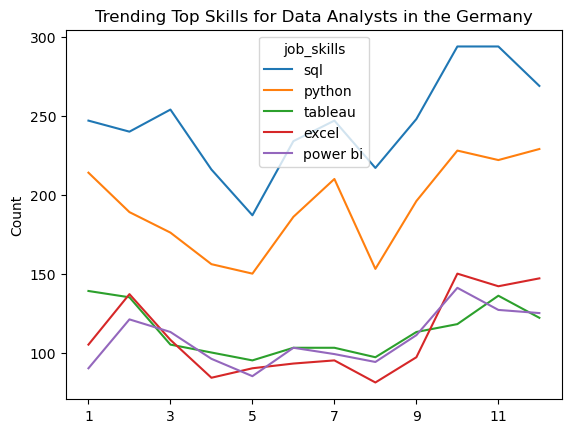

In [187]:
df_Ger_Da_pivot.iloc[:,:5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the Germany')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [188]:
df_Ger_Total = df_Ger_Da.groupby('job_posted_month_no').size()
df_Ger_Total

job_posted_month_no
1     596
2     593
3     582
4     454
5     430
6     558
7     545
8     489
9     656
10    761
11    747
12    720
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the df_DA_pivot DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of total monthly job entries.

In [209]:
df_Ger_Percent = df_Ger_Da_pivot.iloc[:12].div(df_Ger_Total/100, axis=0)

df_Ger_Percent = df_Ger_Percent.reset_index()
df_Ger_Percent['job_posted_month'] = df_Ger_Percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime("%b"))

df_Ger_Percent = df_Ger_Percent.set_index('job_posted_month')
df_Ger_Percent = df_Ger_Percent.drop(columns='job_posted_month_no')

df_Ger_Percent

job_skills,sql,python,tableau,excel,power bi,r,sap,azure,sas,qlik,...,golang,rust,puppet,tidyr,symphony,svn,webex,watson,vue.js,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.442953,35.906040,23.322148,17.617450,15.100671,19.798658,9.060403,6.040268,6.711409,3.523490,...,0.000000,0.000000,0.000000,0.000000,0.167785,0.000000,0.167785,0.000000,0.167785,0.167785
Feb,40.472175,31.871838,22.765599,23.102867,20.404722,14.502530,11.129848,6.576728,5.733558,5.396290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,43.642612,30.240550,18.041237,18.556701,19.415808,16.666667,8.247423,7.731959,6.872852,3.780069,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,47.577093,34.361233,22.026432,18.502203,21.145374,19.162996,9.691630,5.506608,4.405286,3.964758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,43.488372,34.883721,22.093023,20.930233,19.767442,15.581395,7.906977,9.069767,5.116279,6.046512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,41.935484,33.333333,18.458781,16.666667,18.458781,15.412186,9.677419,6.630824,5.376344,3.942652,...,0.000000,0.000000,0.000000,0.179211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,45.321101,38.532110,18.899083,17.431193,18.165138,20.000000,9.357798,5.137615,6.605505,5.137615,...,0.000000,0.183486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,44.376278,31.288344,19.836401,16.564417,19.222904,17.177914,10.429448,7.566462,3.271984,3.680982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.204499,0.000000,0.000000,0.000000,0.000000
Sep,37.804878,29.878049,17.225610,14.786585,16.920732,16.615854,8.841463,6.402439,4.268293,4.420732,...,0.152439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


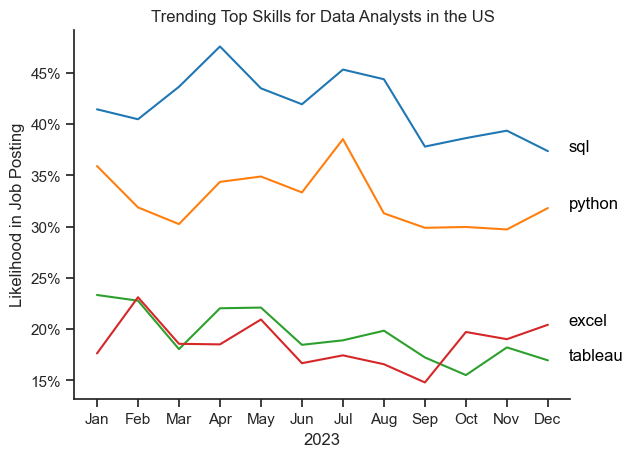

In [245]:

from matplotlib.ticker import PercentFormatter
df_pivot = df_Ger_Percent.iloc[:,:4]

sns.lineplot(data=df_pivot,dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()

for i in range(4):
    plt.text(11.5, df_pivot.iloc[-1, i], df_pivot.columns[i], color='black')

plt.show()